<a href="https://colab.research.google.com/github/Mega-Ryan/Fetal_Health_Classification/blob/main/Fetal_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import packages

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics

import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Load data

In [ ]:
#read data into dataframe
data = pd.read_csv ('/content/drive/MyDrive/Fetal_Health/fetal_health.csv')
print(data)
print(data)
print(data)

      baseline value  accelerations  ...  histogram_tendency  fetal_health
0              120.0          0.000  ...                 1.0           2.0
1              132.0          0.006  ...                 0.0           1.0
2              133.0          0.003  ...                 0.0           1.0
3              134.0          0.003  ...                 1.0           1.0
4              132.0          0.007  ...                 1.0           1.0
...              ...            ...  ...                 ...           ...
2121           140.0          0.000  ...                 0.0           2.0
2122           140.0          0.001  ...                 1.0           2.0
2123           140.0          0.001  ...                 1.0           2.0
2124           140.0          0.001  ...                 1.0           2.0
2125           142.0          0.002  ...                 0.0           1.0

[2126 rows x 22 columns]


# Exploratory Data Analysis

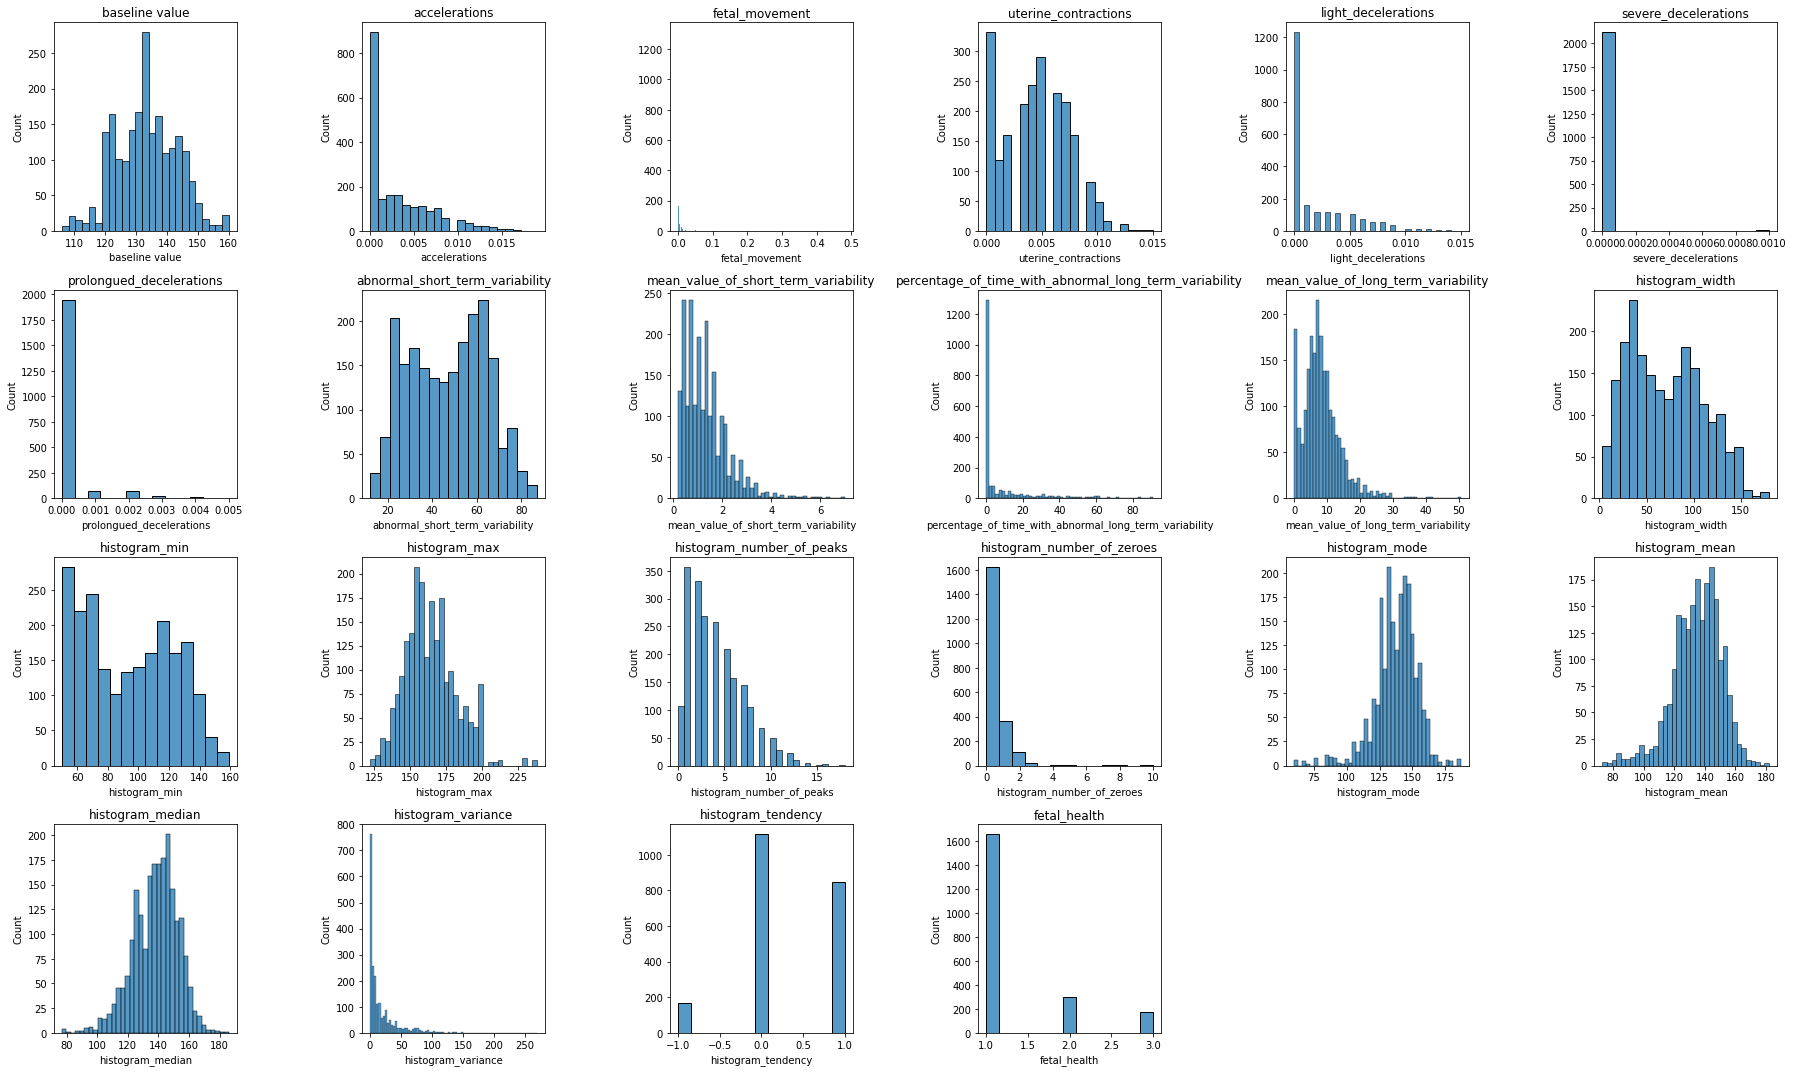

In [ ]:
# hist plot
eda_data = data.copy()

plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_data.columns):
  plt.subplot(4, 6, i+1)
  sns.histplot(data=eda_data[column])
  plt.title(column)

plt.tight_layout()
plt.show()

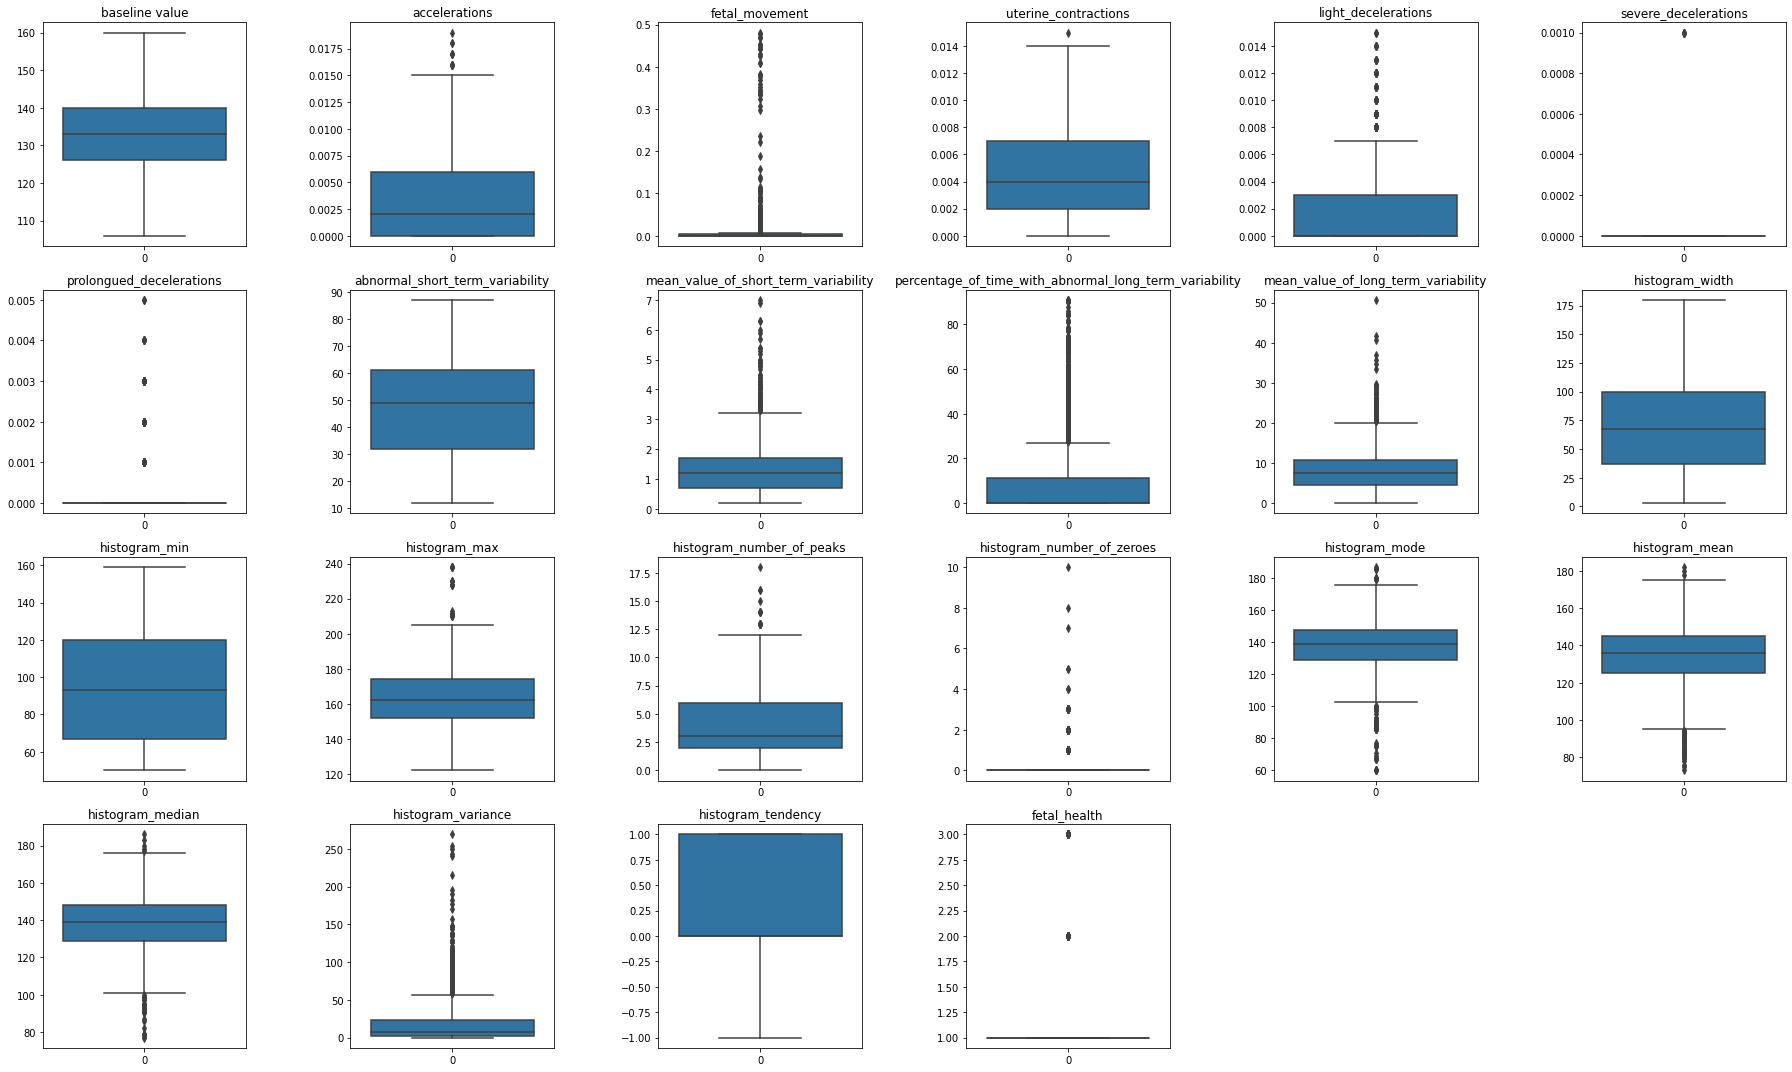

In [ ]:
# box plot
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_data.columns):
  plt.subplot(4, 6, i+1)
  sns.boxplot(data=eda_data[column])
  plt.title(column)

plt.tight_layout()
plt.show()

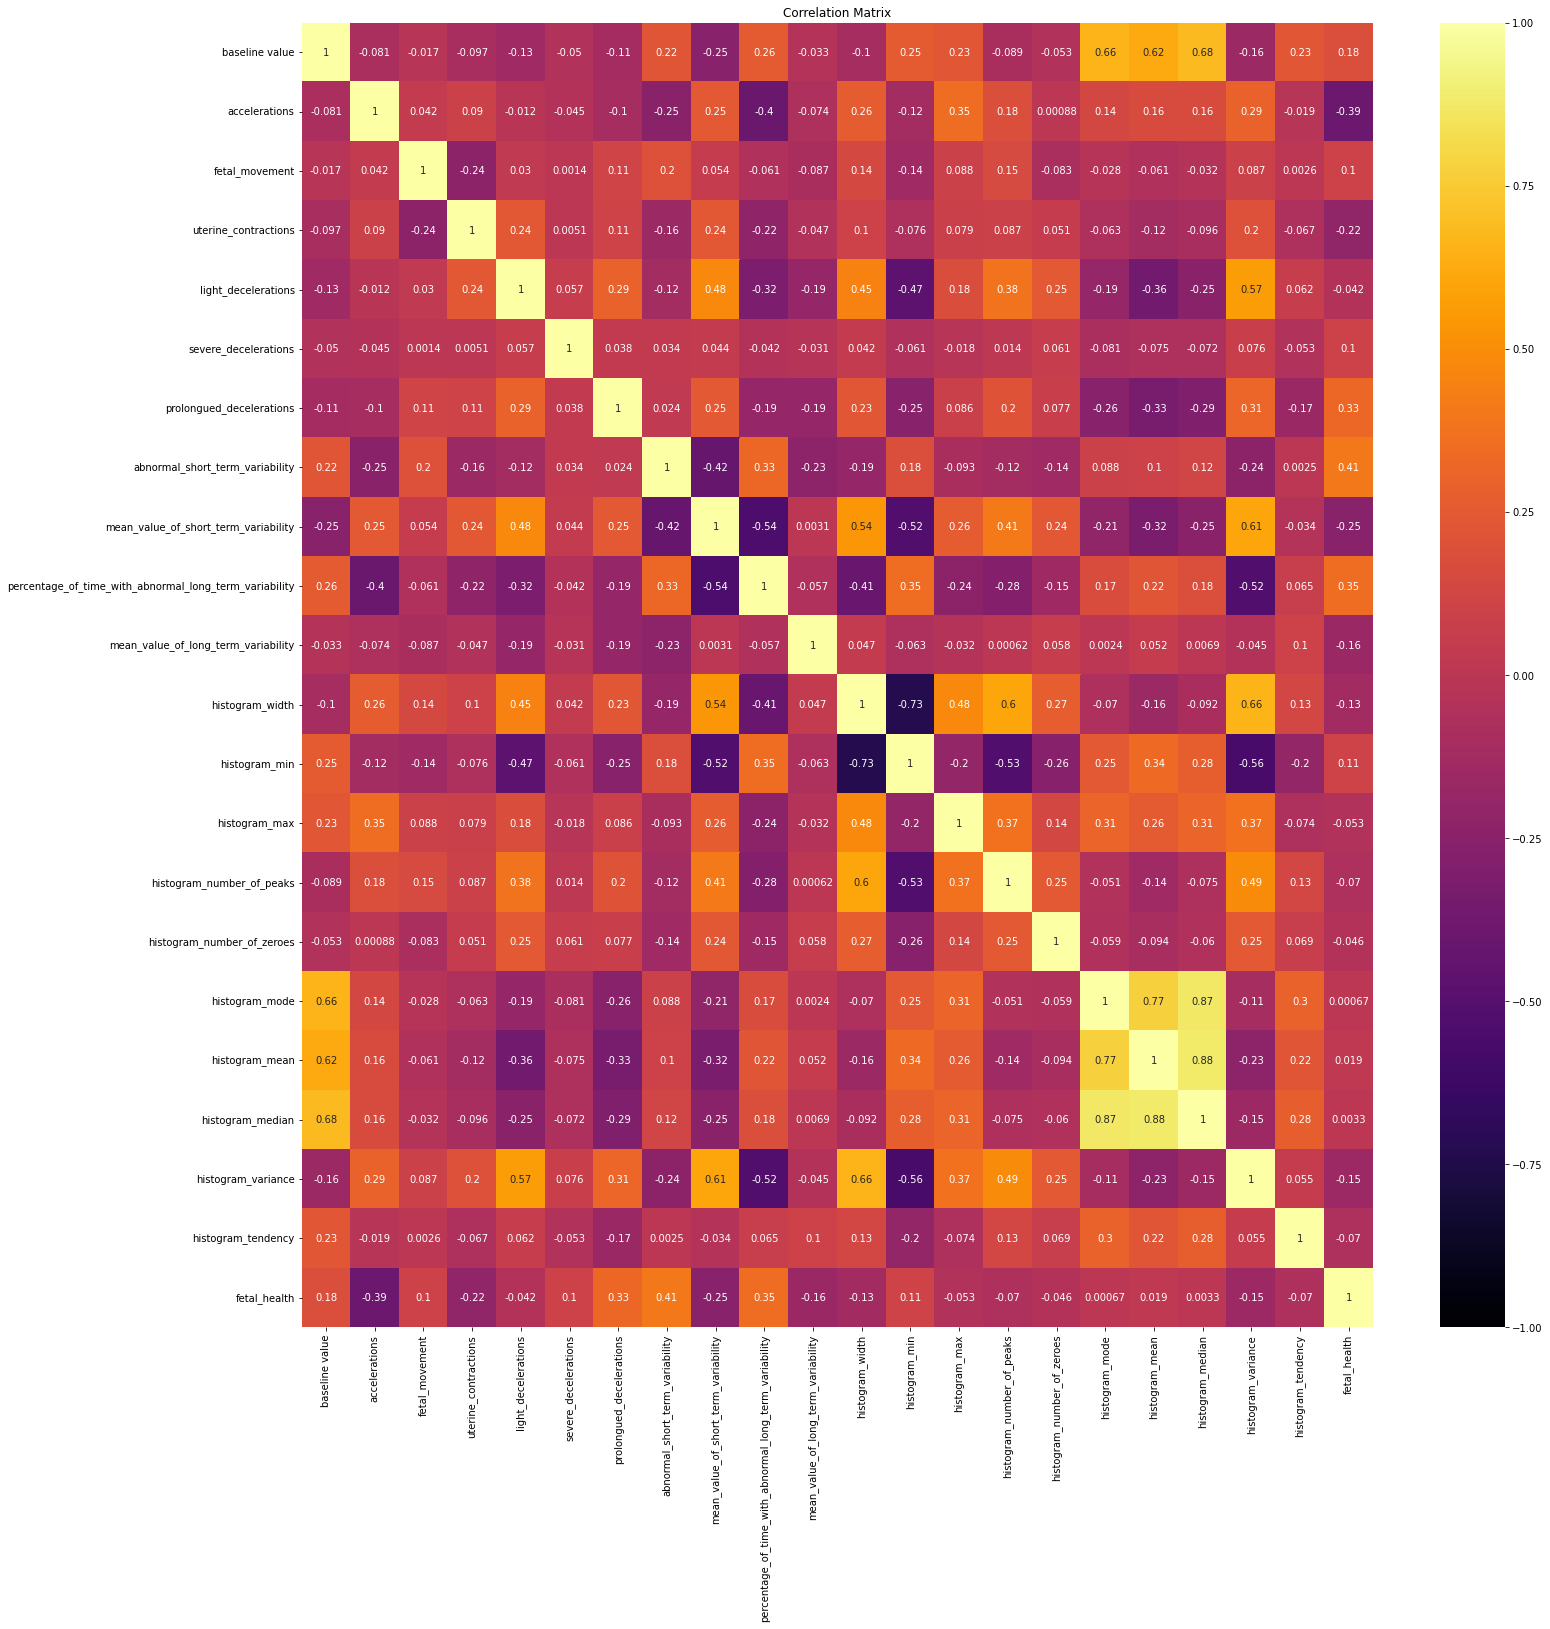

In [ ]:
# correlation between attributes
corr = eda_data.corr(method='kendall')

plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='inferno')
plt.title("Correlation Matrix")
plt.show()

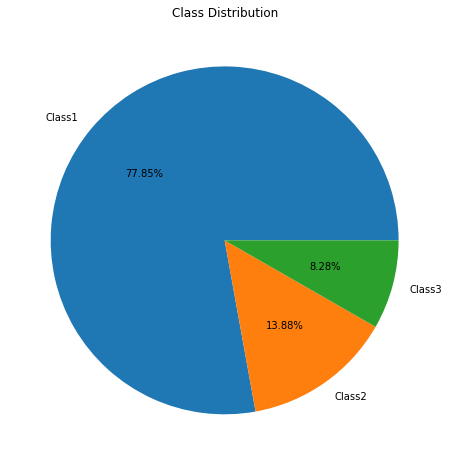

In [ ]:
# percetage of each class

plt.figure(figsize=(8, 8))
plt.pie(
    eda_data['fetal_health'].value_counts(),
    labels=['Class1', 'Class2', 'Class3'],
    autopct='%.2f%%'
)

plt.title('Class Distribution')
plt.show()

# Bayes Optimization with LDA

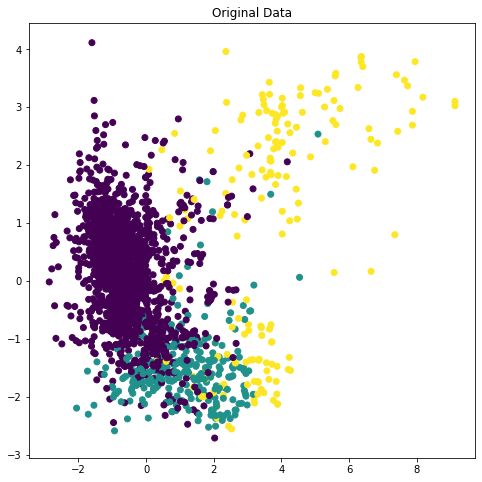

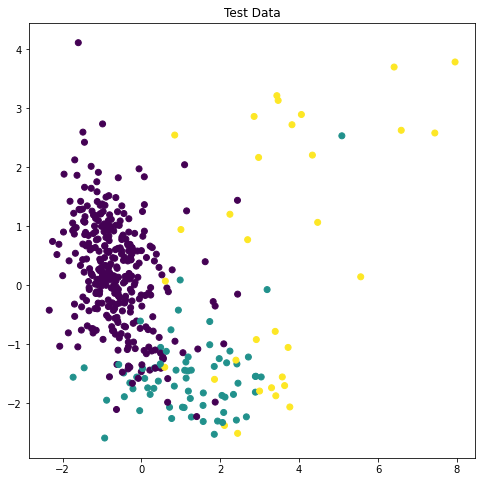

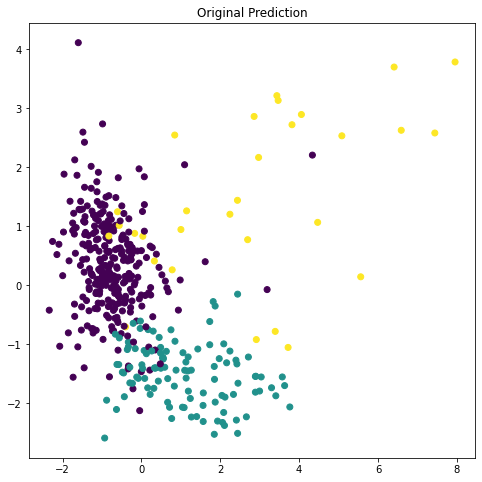

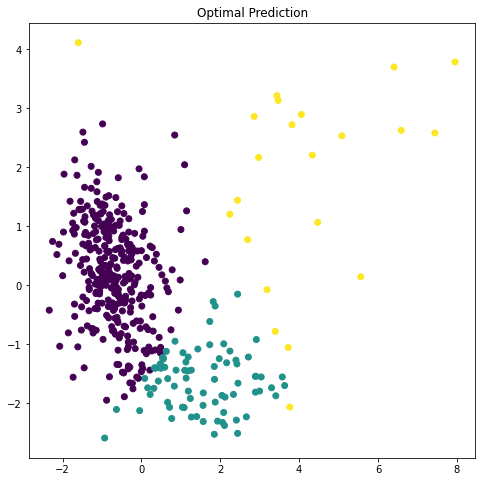

[[276  40  10]
 [  8  59   1]
 [  2  11  19]]


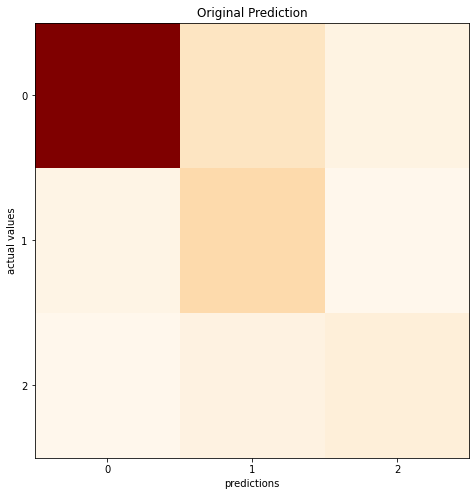

[[305  19   2]
 [ 15  51   2]
 [  3  11  18]]


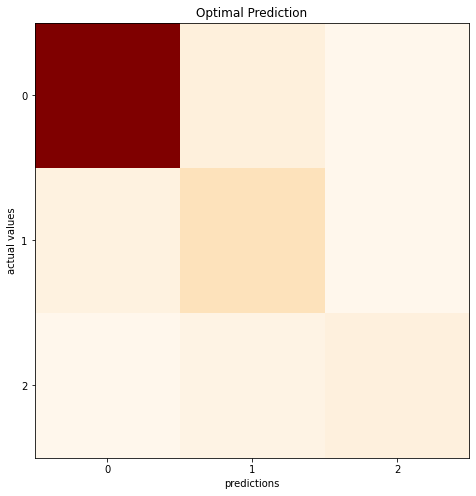

original accuracy = 0.8309859154929577
original cross validation accuracy = 0.8047058823529414
optimal accuracy = 0.8779342723004695
optimal cross validation accuracy = 0.8805882352941177


In [ ]:
Y = data.fetal_health.to_numpy(dtype='int')
X = data.drop(['fetal_health'],axis=1)

# original data training & test
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)
Gau_model = GaussianNB()
bayes = Gau_model.fit(train_X, train_Y)
pred_Y1 = bayes.predict(test_X)
acc1 = metrics.accuracy_score(test_Y, pred_Y1)
crossVal1 = cross_val_score(bayes, train_X, train_Y, cv=10, scoring='accuracy').mean()


# LDA-optimized data training & test
lda = LinearDiscriminantAnalysis(n_components=2)
reduced_X = lda.fit_transform(X, Y)


train_X, test_X, train_Y, test_Y = train_test_split(reduced_X, Y, test_size=0.2, shuffle=True, random_state=1)
Gau_model = GaussianNB()
bayes = Gau_model.fit(train_X, train_Y)
pred_Y2 = bayes.predict(test_X)
acc2 = metrics.accuracy_score(test_Y, pred_Y2)
crossVal2 = cross_val_score(bayes, train_X, train_Y, cv=10, scoring='accuracy').mean()


plt.figure(figsize=(8, 8))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=Y, marker='o')
plt.title('Original Data')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(test_X[:,0], test_X[:,1], c=test_Y, marker='o')
plt.title('Test Data')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(test_X[:,0], test_X[:,1], c=pred_Y1, marker='o')
plt.title('Original Prediction')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(test_X[:,0], test_X[:,1], c=pred_Y2, marker='o')
plt.title('Optimal Prediction')
plt.show()

res_mat = metrics.confusion_matrix(test_Y, pred_Y1)
print(res_mat)
plt.figure(figsize=(8,8))
plt.imshow(res_mat, cmap='OrRd')
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.title('Original Prediction')
plt.show()

res_mat = metrics.confusion_matrix(test_Y, pred_Y2)
print(res_mat)
plt.figure(figsize=(8,8))
plt.imshow(res_mat, cmap='OrRd')
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.title('Optimal Prediction')
plt.show()

print('original accuracy = ' + str(acc1))
print('original cross validation accuracy = ' + str(crossVal1))
print('optimal accuracy = ' + str(acc2))
print('optimal cross validation accuracy = ' + str(crossVal2))

# Bayes Optimization with PCA

[0.7652582159624414, 0.7652582159624414, 0.7652582159624414, 0.8028169014084507, 0.8051643192488263, 0.8051643192488263, 0.8098591549295775, 0.8098591549295775, 0.8169014084507042, 0.8051643192488263, 0.8098591549295775, 0.8098591549295775, 0.7887323943661971, 0.7887323943661971, 0.8098591549295775, 0.812206572769953, 0.8192488262910798, 0.8215962441314554, 0.8215962441314554, 0.8075117370892019, 0.7863849765258216]
[0.7817647058823529, 0.7817647058823529, 0.7817647058823529, 0.8158823529411764, 0.8129411764705882, 0.8158823529411764, 0.8147058823529412, 0.8158823529411764, 0.8070588235294117, 0.8164705882352941, 0.8105882352941176, 0.8088235294117647, 0.8029411764705883, 0.8, 0.8058823529411765, 0.8052941176470588, 0.8152941176470587, 0.8158823529411764, 0.8270588235294116, 0.8299999999999998, 0.7929411764705883]


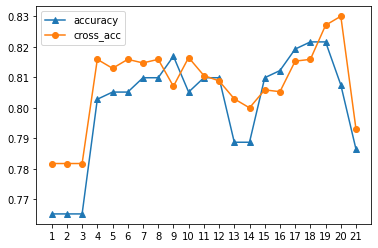

In [ ]:
accuracyList = []
crossValList = []


# PCA-reduced dimensions from 1 to 20
Y = data.fetal_health.to_numpy(dtype='int')
X = data.drop(['fetal_health'],axis=1)

for i in range(20, 0, -1):
  pca = PCA(n_components=i)
  reduced_X = pca.fit_transform(X)

  train_X, test_X, train_Y, test_Y = train_test_split(reduced_X, Y, test_size=0.2, shuffle=True, random_state=1)

  scaler = StandardScaler()
  scaler.fit(train_X)
  train_X = scaler.transform(train_X)
  test_X = scaler.transform(test_X)

  Ber_model = BernoulliNB()
  bayes = Ber_model.fit(train_X, train_Y)

  pred_Y = bayes.predict(test_X)
  acc = metrics.accuracy_score(test_Y, pred_Y)
  crossVal = cross_val_score(bayes, train_X, train_Y, cv=10, scoring='accuracy').mean()

  accuracyList.append(acc)
  crossValList.append(crossVal)
  X = reduced_X

accuracyList.reverse()
crossValList.reverse()


# Original data
Y = data.fetal_health.to_numpy(dtype='int')
X = data.drop(['fetal_health'],axis=1)


train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

Ber_model = BernoulliNB()
bayes = Ber_model.fit(train_X, train_Y)

pred_Y = bayes.predict(test_X)
acc = metrics.accuracy_score(test_Y, pred_Y)
crossVal = cross_val_score(bayes, train_X, train_Y, cv=10, scoring='accuracy').mean()

accuracyList.append(acc)
crossValList.append(crossVal)


# Show results
print(accuracyList)
print(crossValList)

coord_X = [[i] for i in range(1, 22)]
coord_Y1 = accuracyList
coord_Y2 = crossValList
plt.plot(coord_X, coord_Y1, '-^', label='accuracy')
plt.plot(coord_X, coord_Y2, '-o', label='cross_acc')
plt.xticks(np.arange(1, 22, 1))
plt.legend()
plt.show()

# 1~20: PCA
# 21: Manual

Accuracy: 0.8215962441314554
[[309  13   4]
 [ 32  30   6]
 [ 15   6  11]]


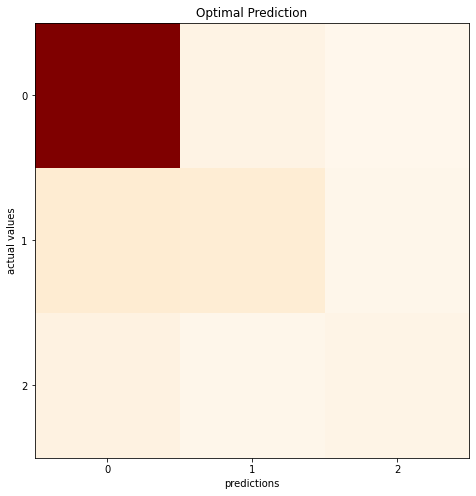

In [ ]:
Y = data.fetal_health.to_numpy(dtype='int')
X = data.drop(['fetal_health'],axis=1)

pca = PCA(n_components=19)
reduced_X = pca.fit_transform(X)

train_X, test_X, train_Y, test_Y = train_test_split(reduced_X, Y, test_size = 0.2, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

# Load model
Ber_model = BernoulliNB()
bayes = Ber_model.fit(train_X, train_Y)

#Predict the response for test dataset
pred_Y = bayes.predict(test_X)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_Y, pred_Y))

res_mat = metrics.confusion_matrix(test_Y, pred_Y)
print(res_mat)
plt.figure(figsize=(8,8))
plt.imshow(res_mat, cmap='OrRd')
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.title('Optimal Prediction')
plt.show()

# Decision Tree Parameter Optimization

In [ ]:
Y = data.fetal_health.to_numpy(dtype='int')
X = data.drop(['fetal_health'],axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

# Default parameters
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(train_X, train_Y)

pred_Y = dec_tree.predict(test_X)
crossVal = cross_val_score(dec_tree, train_X, train_Y, cv=10, scoring='accuracy').mean()
print('original cross validation accuracy = ' + str(crossVal))


# Optimal parameters
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2,4,6,8,10,12,14,16,None],
    'class_weight': [None, 'balanced']
}

GS_CV = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=parameters)
GS_CV.fit(train_X, train_Y)


opt_dec_tree = tree.DecisionTreeClassifier(
    **GS_CV.best_params_
)
opt_dec_tree.fit(train_X, train_Y)

pred_Y = opt_dec_tree.predict(test_X)
crossVal = cross_val_score(opt_dec_tree, train_X, train_Y, cv=10, scoring='accuracy').mean()
print('optimal cross validation accuracy = ' + str(crossVal))

original cross validation accuracy = 0.9211764705882354
optimal cross validation accuracy = 0.9276470588235295


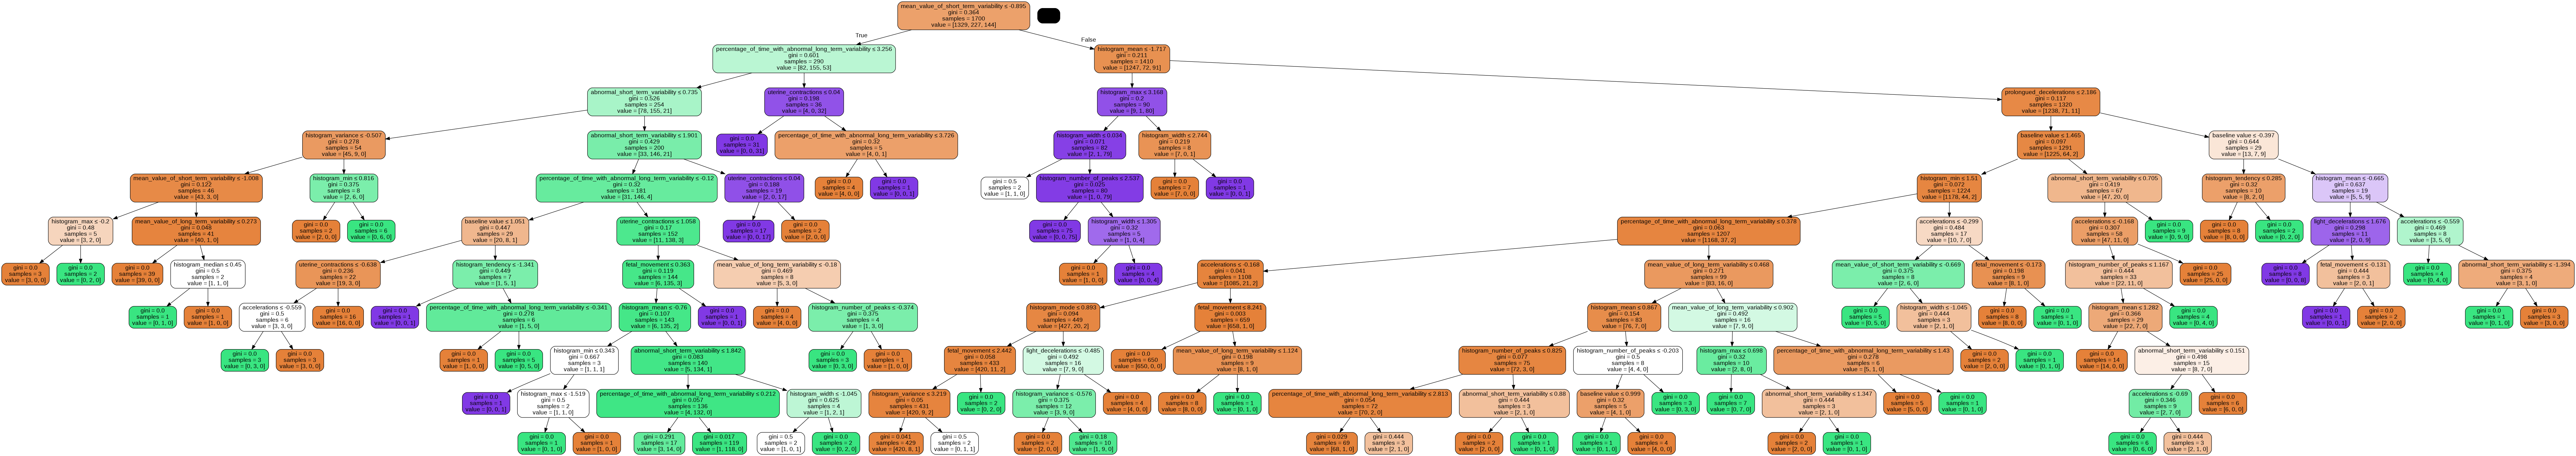

In [ ]:
# optimal decision tree visualization
dot_data = tree.export_graphviz(
    opt_dec_tree, out_file=None, 
    feature_names=X.columns,
    filled=True, rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

0.9248826291079812
[[319   7   0]
 [ 20  46   2]
 [  3   0  29]]


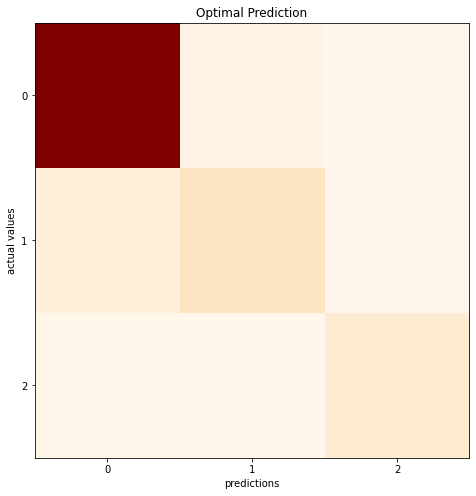

In [ ]:
print(metrics.accuracy_score(test_Y, pred_Y))

res_mat = metrics.confusion_matrix(test_Y, pred_Y)
print(res_mat)
plt.figure(figsize=(8,8))
plt.imshow(res_mat, cmap='OrRd')
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.title('Optimal Prediction')
plt.show()

# Random Forest

original accuracy = 0.9342723004694836
original cross validation accuracy = 0.9458823529411765


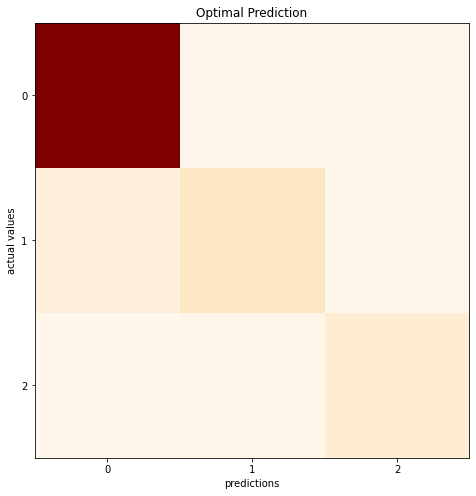

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 90}
optimal accuracy = 0.931924882629108
optimal cross validation accuracy = 0.9476470588235294


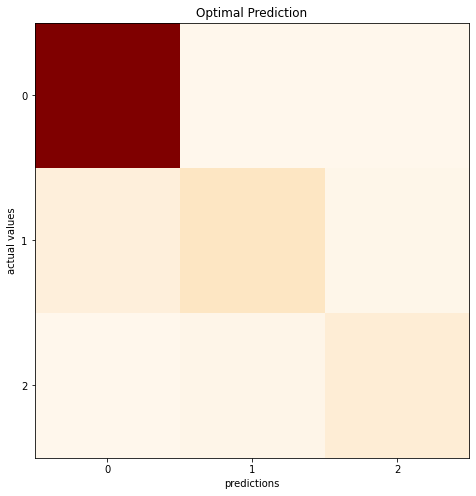

In [ ]:
Y = data.fetal_health
X = data.drop('fetal_health', axis=1)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)


forest = ensemble.RandomForestClassifier()
forest.fit(train_X, train_Y)
pred_Y = forest.predict(test_X)
crossVal = cross_val_score(forest, train_X, train_Y, cv=10, scoring='accuracy').mean()
print('original accuracy = ' + str(metrics.accuracy_score(test_Y, pred_Y)))
print('original cross validation accuracy = ' + str(crossVal))

res_mat = metrics.confusion_matrix(test_Y, pred_Y)
plt.figure(figsize=(8,8))
plt.imshow(res_mat, cmap='OrRd')
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.title('Optimal Prediction')
plt.show()

params = {
    'criterion':['entropy','gini'],
    'max_depth':[6,8,10,12,14,16],
    'n_estimators':[10,30,50,70,90],
    'class_weight':['balanced','balanced_subsample',None],
}

GS_CV = GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=params)
GS_CV.fit(train_X, train_Y)
print(GS_CV.best_params_)

opt_forest = ensemble.RandomForestClassifier(**GS_CV.best_params_)
opt_forest.fit(train_X, train_Y)
crossVal = cross_val_score(opt_forest, train_X, train_Y, cv=10, scoring='accuracy').mean()
pred_Y = opt_forest.predict(test_X)
print('optimal accuracy = ' + str(metrics.accuracy_score(test_Y, pred_Y)))
print('optimal cross validation accuracy = ' + str(crossVal))

res_mat = metrics.confusion_matrix(test_Y, pred_Y)
plt.figure(figsize=(8,8))
plt.imshow(res_mat, cmap='OrRd')
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
plt.title('Optimal Prediction')
plt.show()